## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.202179  1.083113  1.460798  1.028458  0.656659  0.657901
1  1.360418 -1.041403  0.488057  0.456376 -1.575845 -0.586747
2  0.245367  1.586906 -1.265036 -1.361739 -0.919735  0.280775
3  1.085088  0.321774 -0.619082 -1.417537 -0.819421 -0.198003
4  0.323148 -0.846481  1.343314  0.502034  1.237083  0.678544


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0376439	total: 46.6ms	remaining: 46.6s
1:	learn: 1.0227967	total: 47ms	remaining: 23.5s
2:	learn: 1.0096616	total: 47.5ms	remaining: 15.8s
3:	learn: 0.9972710	total: 47.9ms	remaining: 11.9s
4:	learn: 0.9886372	total: 48.3ms	remaining: 9.62s
5:	learn: 0.9769394	total: 48.8ms	remaining: 8.08s
6:	learn: 0.9638481	total: 49.2ms	remaining: 6.98s
7:	learn: 0.9535738	total: 49.6ms	remaining: 6.16s
8:	learn: 0.9421982	total: 50ms	remaining: 5.51s
9:	learn: 0.9311365	total: 50.4ms	remaining: 4.99s
10:	learn: 0.9220090	total: 50.8ms	remaining: 4.57s
11:	learn: 0.9107738	total: 51.2ms	remaining: 4.22s
12:	learn: 0.8987277	total: 51.6ms	remaining: 3.92s
13:	learn: 0.8893164	total: 52ms	remaining: 3.66s
14:	learn: 0.8804671	total: 52.4ms	remaining: 3.44s
15:	learn: 0.8717619	total: 52.8ms	remaining: 3.25s
16:	learn: 0.8618937	total: 53.2ms	remaining: 3.08s
17:	learn: 0.8527215	total: 53.6ms	remaining: 2.92s
18:	learn: 0.8432003	total: 54ms	remaining: 2.79s


189:	learn: 0.1727482	total: 123ms	remaining: 524ms
190:	learn: 0.1712357	total: 123ms	remaining: 523ms
191:	learn: 0.1698498	total: 124ms	remaining: 521ms
192:	learn: 0.1684163	total: 124ms	remaining: 519ms
193:	learn: 0.1669883	total: 125ms	remaining: 518ms
194:	learn: 0.1655821	total: 125ms	remaining: 516ms
195:	learn: 0.1641026	total: 125ms	remaining: 514ms
196:	learn: 0.1628355	total: 126ms	remaining: 512ms
197:	learn: 0.1614340	total: 126ms	remaining: 510ms
198:	learn: 0.1600901	total: 126ms	remaining: 509ms
199:	learn: 0.1588482	total: 127ms	remaining: 507ms
200:	learn: 0.1574979	total: 127ms	remaining: 505ms
201:	learn: 0.1562770	total: 127ms	remaining: 503ms
202:	learn: 0.1548667	total: 128ms	remaining: 502ms
203:	learn: 0.1537722	total: 128ms	remaining: 500ms
204:	learn: 0.1525347	total: 128ms	remaining: 498ms
205:	learn: 0.1515404	total: 129ms	remaining: 496ms
206:	learn: 0.1504541	total: 129ms	remaining: 495ms
207:	learn: 0.1493386	total: 129ms	remaining: 493ms
208:	learn: 

457:	learn: 0.0276829	total: 223ms	remaining: 264ms
458:	learn: 0.0274894	total: 224ms	remaining: 264ms
459:	learn: 0.0274359	total: 224ms	remaining: 263ms
460:	learn: 0.0273832	total: 225ms	remaining: 263ms
461:	learn: 0.0272636	total: 225ms	remaining: 262ms
462:	learn: 0.0272123	total: 225ms	remaining: 261ms
463:	learn: 0.0271618	total: 226ms	remaining: 261ms
464:	learn: 0.0270337	total: 226ms	remaining: 260ms
465:	learn: 0.0269868	total: 226ms	remaining: 259ms
466:	learn: 0.0268881	total: 227ms	remaining: 259ms
467:	learn: 0.0268395	total: 227ms	remaining: 258ms
468:	learn: 0.0267938	total: 227ms	remaining: 257ms
469:	learn: 0.0266708	total: 228ms	remaining: 257ms
470:	learn: 0.0265021	total: 228ms	remaining: 256ms
471:	learn: 0.0264555	total: 228ms	remaining: 256ms
472:	learn: 0.0263586	total: 229ms	remaining: 255ms
473:	learn: 0.0263054	total: 229ms	remaining: 254ms
474:	learn: 0.0262533	total: 229ms	remaining: 254ms
475:	learn: 0.0260935	total: 230ms	remaining: 253ms
476:	learn: 

734:	learn: 0.0095953	total: 322ms	remaining: 116ms
735:	learn: 0.0095567	total: 323ms	remaining: 116ms
736:	learn: 0.0095189	total: 323ms	remaining: 115ms
737:	learn: 0.0094790	total: 324ms	remaining: 115ms
738:	learn: 0.0094332	total: 324ms	remaining: 114ms
739:	learn: 0.0094026	total: 324ms	remaining: 114ms
740:	learn: 0.0093660	total: 325ms	remaining: 113ms
741:	learn: 0.0093177	total: 325ms	remaining: 113ms
742:	learn: 0.0092707	total: 325ms	remaining: 113ms
743:	learn: 0.0092321	total: 326ms	remaining: 112ms
744:	learn: 0.0091887	total: 326ms	remaining: 112ms
745:	learn: 0.0091533	total: 326ms	remaining: 111ms
746:	learn: 0.0091101	total: 327ms	remaining: 111ms
747:	learn: 0.0090720	total: 327ms	remaining: 110ms
748:	learn: 0.0090596	total: 327ms	remaining: 110ms
749:	learn: 0.0090399	total: 328ms	remaining: 109ms
750:	learn: 0.0090277	total: 328ms	remaining: 109ms
751:	learn: 0.0089988	total: 328ms	remaining: 108ms
752:	learn: 0.0089647	total: 329ms	remaining: 108ms
753:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

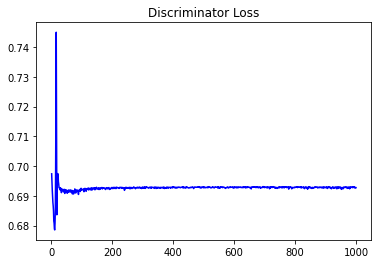

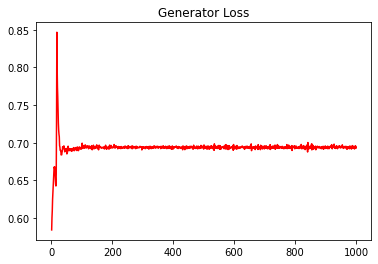

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2714292162989028


#### Sanity Checks 

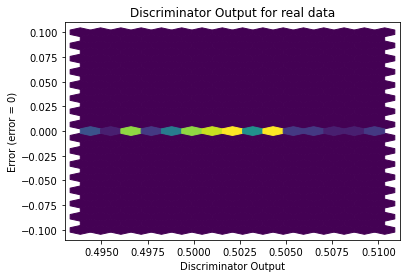

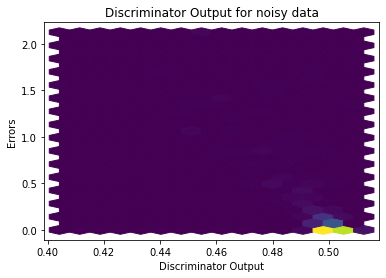

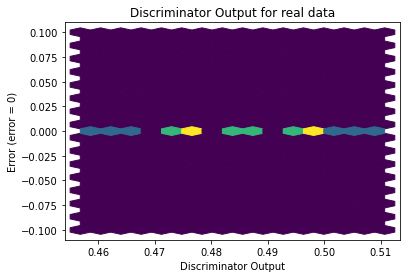

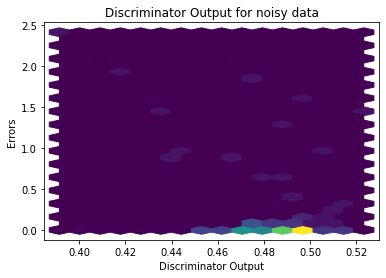

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


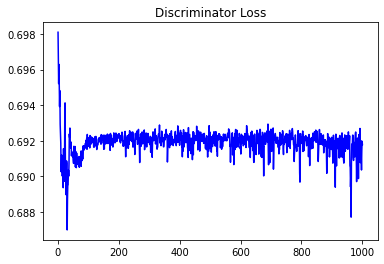

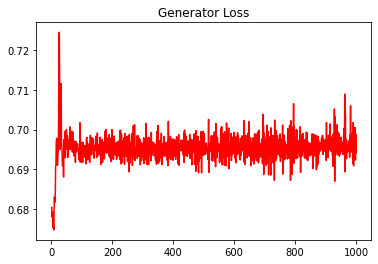

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21673319656789095


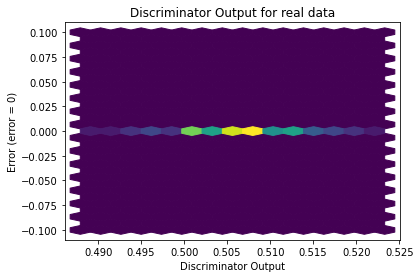

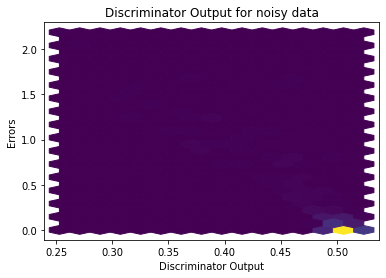

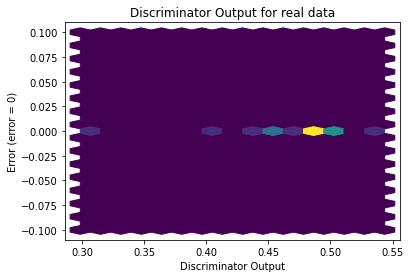

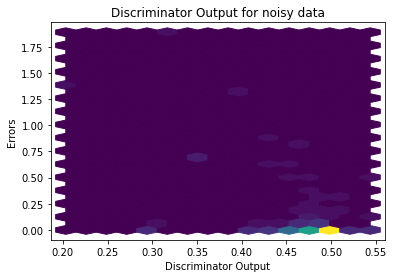

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4835]], device='cuda:0', requires_grad=True)
